In [1]:
# import some of the libraries we need
import numpy as np
import pandas as pd

In [2]:
# read the data from the file
data = pd.read_csv("./sonar.csv", sep = ",",header=None)

# print the first 5 rows
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [3]:
# print the last 5 rows
data.tail(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M
207,0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.1400,0.1843,0.2354,...,0.0146,0.0129,0.0047,0.0039,0.0061,0.0040,0.0036,0.0061,0.0115,M


In [4]:
# drop rows which missing any of the values
data.dropna(axis=0, how='any')
 
# show the size of the data
data.shape

(208, 61)

In [6]:
# converting the label column to numeric value which is understandable by the computer for modeling
from sklearn.preprocessing import LabelEncoder

# seperating all the rows for the column 60 - data labels
labels= data.iloc[:,60]
# defining a label to numerical value convertor
label_encoder = LabelEncoder()
# converting the column 
integer_encoded = label_encoder.fit_transform(labels)
# the result data type don't mach the original data, so updating it back to original data type and giving it  a name
integer_encoded= pd.DataFrame(data=integer_encoded[:],columns=[60])

#see the first 5 row after vonverting
integer_encoded.head(5)

,60
0,1
1,1
2,1
3,1
4,1


In [7]:
#last 5 rows
integer_encoded.tail(5)

,60
203,0
204,0
205,0
206,0
207,0


In [8]:
# see the lables label encoder found in data
list(label_encoder.classes_)

['M', 'R']

In [9]:
# see what each is transformed to 
label_encoder.transform(['M', 'R']) 

array([0, 1])

In [10]:
# remove the original label column from data 
data.drop([60],axis=1, inplace=True)



In [11]:
# attach the new encoded data to data table
data = pd.concat((data,integer_encoded),axis=1)

# print the first 5 rows
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


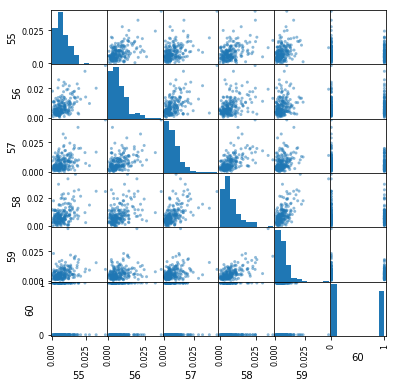

In [13]:
# plotting last 6 column again each other 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

df = data.iloc[:,55:61]
pd.plotting.scatter_matrix(df, figsize=(6, 6))
plt.show()


In [14]:
df.corr()

,55,56,57,58,59,60
55,1.000000,0.515154,0.463659,0.430804,0.349449,-0.129341
56,0.515154,1.000000,0.509805,0.431295,0.287219,-0.000933
57,0.463659,0.509805,1.000000,0.550235,0.329827,-0.184191
58,0.430804,0.431295,0.550235,1.000000,0.642872,-0.130826
59,0.349449,0.287219,0.329827,0.642872,1.000000,-0.090055
60,-0.129341,-0.000933,-0.184191,-0.130826,-0.090055,1.000000


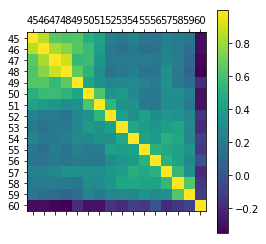

In [19]:
sample = data.iloc[:,45:61]
plt.matshow(sample.corr())
plt.xticks(range(len(sample.columns)), sample.columns)
plt.yticks(range(len(sample.columns)), sample.columns)
plt.colorbar()
plt.show()


In [20]:
# split the data for training and testing 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,0:60], integer_encoded, test_size=0.20, random_state=14)
x_test.head(3)

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
58,0.0225,0.0019,0.0075,0.0097,0.0445,0.0906,0.0889,0.0655,0.1624,0.1452,...,0.0051,0.0034,0.0129,0.0100,0.0044,0.0057,0.0030,0.0035,0.0021,0.0027
105,0.0116,0.0179,0.0449,0.1096,0.1913,0.0924,0.0761,0.1092,0.0757,0.1006,...,0.0031,0.0163,0.0099,0.0084,0.0270,0.0277,0.0097,0.0054,0.0148,0.0092
54,0.0132,0.0080,0.0188,0.0141,0.0436,0.0668,0.0609,0.0131,0.0899,0.0922,...,0.0136,0.0044,0.0028,0.0021,0.0022,0.0048,0.0138,0.0140,0.0028,0.0064


In [21]:
y_test.head(3)

,60
58,1
105,0
54,1


In [22]:
x_train.shape

(166, 60)

In [23]:
x_test.shape

(42, 60)

In [26]:
# Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(x_train, y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [28]:
y_pred = classifier.predict(x_test)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        20
           1       1.00      0.82      0.90        22

   micro avg       0.90      0.90      0.90        42
   macro avg       0.92      0.91      0.90        42
weighted avg       0.92      0.90      0.90        42

